# Proyecto 02 - Gastón Benoit

Resumen del proyecto
Aplica transformación de datos y entrena Modelos Avanzados para desarrollar con mayor profundidad tu modelo de Machine Learning. ¿Qué puedes aprender del problema que estás abordando mediante el estudio de tu propio modelo?

La realización y entrega del Proyecto es individual.

Consigna
En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

El trabajo se organiza en tres partes:

## PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

Detección y eliminación de Outliers

Encoding 

Imputación de valores faltantes

Escalado de datos 

Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

## PARTE B - Modelos Avanzados

Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

## PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

## DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

## Checklist de evaluación
Sugerencias para desarrollar el proyecto:

Este proyecto no cuenta con mínimos entregables indicados en la consigna, pero ten en cuenta lo siguiente:
en la Parte A debes implementar al menos tres de las transformaciones de datos propuestas.
en la Parte B, al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando).
en la Parte C, debes responder al menos una pregunta. Obviamente, ¡cuanto más hagas, más aprenderás y mejor será tu proyecto!
La resolución del proyecto te puede enfrentar a pequeños desafíos que no trabajamos durante los encuentros. Es importante que desarrolles la capacidad de resolverlos. Para ello, consulta las bitácoras, las referencias, los notebooks vistos en clase, la documentación de la librería y, sobre todo, googlea.
Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores. Además, asegúrate de cumplir con las siguientes condiciones (son las que los/as evaluadores/as tendrán en consideración al momento de corregir tu trabajo):

## PARTE A - Transformación de Datos

Debes justificar por qué creés que las transformaciones elegidas aplican en este dataset. Ten en cuenta que, en el manejo de valores atípicos o en la imputación de valores faltantes, los valores obtenidos deben tener sentido. Por ejemplo, valores mayores que cero para superficies, número de baños, etc.
Debes re entrenar un modelo del Proyecto 01 y comparar su desempeño con el modelo obtenido en el Proyecto 01. Una aclaración: con reentrenar nos referimos a usar el mismo proceso de entrenamiento junto con sus hiperparámetros. Pero puede ocurrir - y, de hecho, se espera - que el dataset contenga más atributos que los utilizados en el Proyecto 01.

## PARTE B - Modelos Avanzados

En la optimización de hiperparámetros, debes justificar los parámetros que elegiste para optimizar y el rango de cada uno.

## PARTE C - Interpretación de modelos

Debes estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
Es muy importante que analices los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?
Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías? Ten en cuenta siempre terminar con una discusión sobre lo realizado y conclusiones obtenidas.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib as Path
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

## PARTE A

In [2]:
properaty = pd.read_csv('C:/Users/Gasto/Documents/Data Science/Proyecto_02/DS_Proyecto_01_Datos_Properati.csv')

In [3]:
properaty.shape

(146660, 19)

In [4]:
properaty.head(3)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


In [5]:
properaty.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [6]:
properaty['operation_type'].unique()

array(['Venta'], dtype=object)

In [7]:
propdf = properaty.drop(columns=['start_date','end_date','created_on','currency','title','description','operation_type'], axis=1)

In [8]:
propdf.head()

,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


In [9]:
propdf = propdf.rename(columns={'l2':'Localidad','l3':'Barrio','l1':'País'})

In [10]:
propdf.head()

,lat,lon,País,Localidad,Barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


# TRATADO DE NULOS Y FALTANTES 

In [11]:
propdf.isnull().sum()

lat                 9925
lon                 9959
País                   0
Localidad              0
Barrio                 0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
dtype: int64

In [12]:
propdf.shape

(146660, 12)

In [13]:
print('PORCENTAJE DE NULOS')
for col in propdf.columns:
    nulos = propdf[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/146660))

PORCENTAJE DE NULOS
lat 6.77%
lon 6.79%
País 0.00%
Localidad 0.00%
Barrio 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 4.06%
surface_total 14.00%
surface_covered 14.74%
price 0.00%
property_type 0.00%


Sobre el total de faltantes de, los más representativos me parecen los de superficie. Los de LAT, LON y Baños me parecen más bajos. Debo tener cuidado de no completar los faltantes de baños en unidades que no lleven, como pueden ser los lotes o depósitos. 

In [14]:
propdf['property_type'].unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [15]:
propdf.surface_total.fillna(propdf.surface_covered, inplace=True)
propdf.surface_covered.fillna(propdf.surface_total, inplace=True)

In [16]:
for col in propdf.columns:
    nulos = propdf[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/146660))

lat 6.77%
lon 6.79%
País 0.00%
Localidad 0.00%
Barrio 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 4.06%
surface_total 13.65%
surface_covered 13.65%
price 0.00%
property_type 0.00%


In [17]:
mean_surface = propdf[["surface_covered", "property_type"]].groupby("property_type").agg(pd.Series.median)
mean_surface.to_dict()

{'surface_covered': {'Casa': 160.0,
  'Casa de campo': 161.5,
  'Cochera': 13.5,
  'Departamento': 60.0,
  'Depósito': 412.5,
  'Local comercial': 90.0,
  'Lote': 502.0,
  'Oficina': 57.0,
  'Otro': 406.0,
  'PH': 80.0}}

In [18]:
propdf.reset_index(inplace=True)

In [19]:
propdf = propdf.set_index("property_type")
propdf.surface_covered.fillna(mean_surface.to_dict()["surface_covered"], inplace=True)
propdf.reset_index(inplace=True)
propdf.head()

,property_type,index,lat,lon,País,Localidad,Barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Departamento,0,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0
1,PH,1,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
2,PH,2,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
3,PH,3,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
4,PH,4,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0


In [20]:
for col in propdf.columns:
    nulos = propdf[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/146660))

property_type 0.00%
index 0.00%
lat 6.77%
lon 6.79%
País 0.00%
Localidad 0.00%
Barrio 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 4.06%
surface_total 13.65%
surface_covered 0.00%
price 0.00%


Logro reducir los faltanes de surface_covered a 0. Siendo que no utilizaré Surface_Total, me deshago de la columna. 

In [21]:
propdf = propdf.drop(columns=['surface_total'])

In [22]:
propdf = propdf.drop(columns=['bedrooms'])

In [23]:
propdf.head(2)

,property_type,index,lat,lon,País,Localidad,Barrio,rooms,bathrooms,surface_covered,price
0,Departamento,0,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,2.0,140.0,153000.0
1,PH,1,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,2.0,58.0,159000.0


In [24]:
propdf['Barrio'].unique

<bound method Series.unique of 0         San Cristobal
1                 Boedo
2               Palermo
3               Palermo
4              La Plata
              ...      
146655      Berazategui
146656            Pilar
146657            Pilar
146658            Pilar
146659            Pilar
Name: Barrio, Length: 146660, dtype: object>

In [25]:
lon_barrio = propdf[['lon', 'Barrio']].groupby('Barrio').agg(pd.Series.mean)
lat_barrio = propdf[['lat', 'Barrio']].groupby('Barrio').agg(pd.Series.mean)
propdf = propdf.set_index('Barrio')
propdf.lon.fillna(lon_barrio.to_dict()['lon'], inplace=True)
propdf.lat.fillna(lat_barrio.to_dict()['lat'], inplace=True)
propdf = propdf.reset_index()
propdf.head(2)

,Barrio,property_type,index,lat,lon,País,Localidad,rooms,bathrooms,surface_covered,price
0,San Cristobal,Departamento,0,-34.605880,-58.384949,Argentina,Capital Federal,7.0,2.0,140.0,153000.0
1,Boedo,PH,1,-34.624056,-58.412110,Argentina,Capital Federal,2.0,2.0,58.0,159000.0


In [26]:
for col in propdf.columns:
    nulos = propdf[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/146660))

Barrio 0.00%
property_type 0.00%
index 0.00%
lat 0.00%
lon 0.00%
País 0.00%
Localidad 0.00%
rooms 0.00%
bathrooms 4.06%
surface_covered 0.00%
price 0.00%


In [27]:
mean_bathrooms = propdf[["bathrooms", "property_type"]].groupby("property_type").agg(pd.Series.median)
mean_bathrooms.to_dict()

{'bathrooms': {'Casa': 2.0,
  'Casa de campo': 2.0,
  'Cochera': 1.0,
  'Departamento': 1.0,
  'Depósito': 1.0,
  'Local comercial': 1.0,
  'Lote': 1.0,
  'Oficina': 1.0,
  'Otro': 2.0,
  'PH': 1.0}}

De esta forma me aseguro de llenar valores faltantes de baños por tipo de propiedad y reduzco el error de llenar con más baños propiedades que solo llevan 1. 

In [28]:
propdf = propdf.set_index("property_type")
propdf.bathrooms.fillna(mean_bathrooms.to_dict()["bathrooms"], inplace=True)
propdf.reset_index(inplace=True)
propdf.head()

,property_type,Barrio,index,lat,lon,País,Localidad,rooms,bathrooms,surface_covered,price
0,Departamento,San Cristobal,0,-34.605880,-58.384949,Argentina,Capital Federal,7.0,2.0,140.0,153000.0
1,PH,Boedo,1,-34.624056,-58.412110,Argentina,Capital Federal,2.0,2.0,58.0,159000.0
2,PH,Palermo,2,-34.593569,-58.427474,Argentina,Capital Federal,2.0,1.0,45.0,125000.0
3,PH,Palermo,3,-34.581294,-58.436754,Argentina,Capital Federal,2.0,1.0,50.0,295000.0
4,PH,La Plata,4,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,2.0,1.0,35.0,40000.0


In [29]:
for col in propdf.columns:
    nulos = propdf[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/146660))

property_type 0.00%
Barrio 0.00%
index 0.00%
lat 0.00%
lon 0.00%
País 0.00%
Localidad 0.00%
rooms 0.00%
bathrooms 0.00%
surface_covered 0.00%
price 0.00%


# Tratamiento de Outliers 

En primera instancia iba a realizar modelos con todas las zonas geográficas, pero dado que hay que realizar una comparación con el modelo 01 que solo estaba restringido para "Capital Federal" me parece más acertado realizar el mismo filtrado por zona. Aunque haré el tratamiento de Outliers considerando todos los tipos de propiedades. Luego veré si deseo entrenar el modelo con todos esas propiedades o lo vuelvo a filtrar para "Departamento, Casa y PH". 

In [31]:
#propdf1 = propdf [(propdf['property_type']=='Departamento') | (propdf['property_type']=='Casa') | (propdf['property_type']=='PH')]
propdf2 = propdf[(propdf['Localidad']=='Capital Federal')]

propdf2.shape

(92539, 11)

In [31]:
propdf2.head(2)

,property_type,Barrio,index,lat,lon,País,Localidad,rooms,bathrooms,surface_covered,price
0,Departamento,San Cristobal,0,-34.605880,-58.384949,Argentina,Capital Federal,7.0,2.0,140.0,153000.0
1,PH,Boedo,1,-34.624056,-58.412110,Argentina,Capital Federal,2.0,2.0,58.0,159000.0


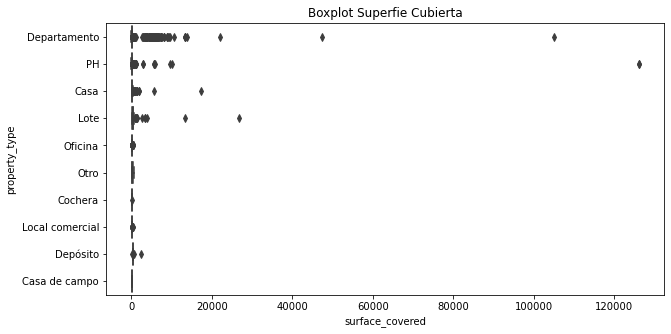

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x='surface_covered', y='property_type',data=propdf2)
plt.title('Boxplot Superfie Cubierta')
plt.show()

In [34]:
#plt.figure(figsize=(10,5))
#sns.histplot(propdf2['surface_covered'])
#plt.title('Histograma por Superficie Cubierta')
#plt.show()

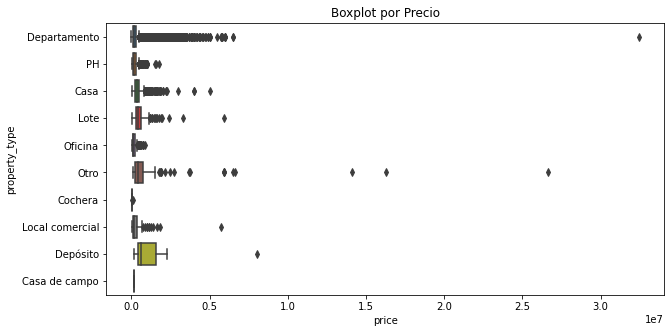

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price', y='property_type',data=propdf2)
plt.title('Boxplot por Precio')
plt.show()

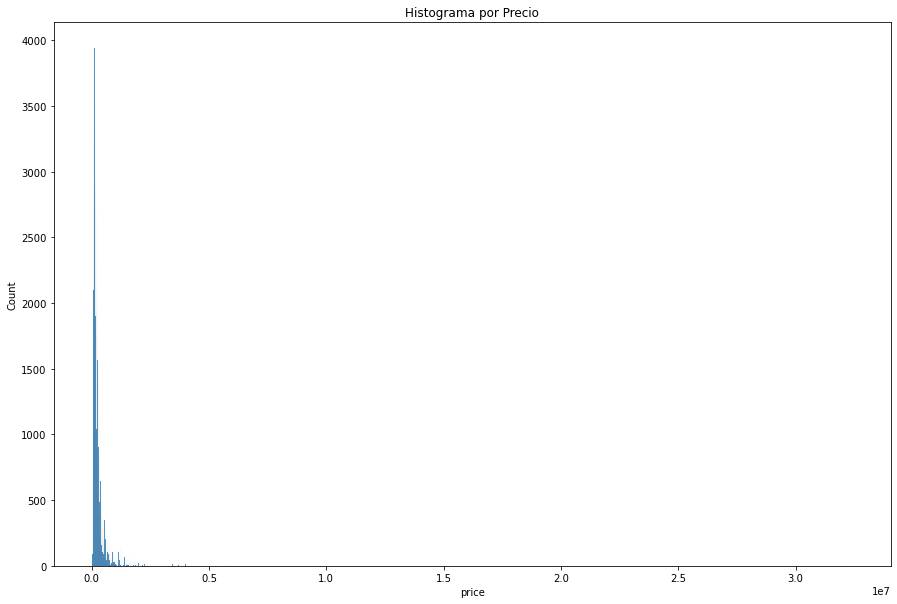

In [35]:
plt.figure(figsize=(15,10))
sns.histplot(propdf2['price'])
plt.title('Histograma por Precio')
plt.show()

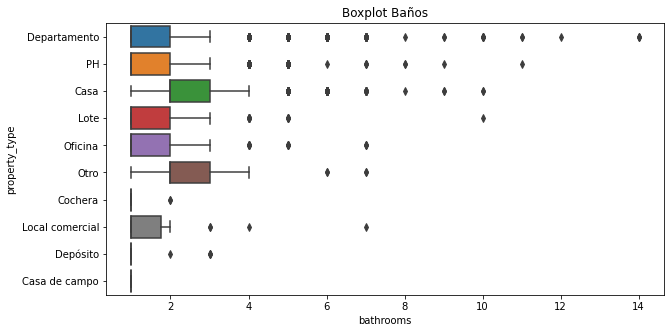

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bathrooms', y='property_type',data=propdf2)
plt.title('Boxplot Baños')
plt.show()

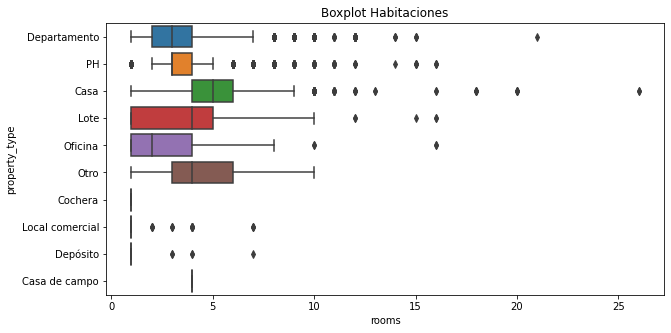

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='rooms', y='property_type',data=propdf2)
plt.title('Boxplot Habitaciones')
plt.show()

In [38]:
propdf2.groupby('property_type').agg({'surface_covered':['min','mean','max']})

surface_covered                      
                            min        mean       max
property_type                                        
Casa                       25.0  210.770059   17220.0
Casa de campo             200.0  200.000000     200.0
Cochera                    13.5   13.514151      15.0
Departamento                1.0   83.254324  104890.0
Depósito                  170.0  473.483333    2400.0
Local comercial            26.0   96.588235     405.0
Lote                       38.0  585.497942   26824.0
Oficina                    14.0   69.757642     486.0
Otro                       40.0  255.543860     678.0
PH                          1.0  130.531647  126062.0

In [39]:
propdf2.describe()

,index,lat,lon,rooms,bathrooms,surface_covered,price
count,92539.000000,92539.000000,92539.000000,92539.00000,92539.000000,92539.000000,9.253900e+04
mean,71547.646960,-34.598888,-58.435161,2.96180,1.548374,93.479030,2.612721e+05
std,41919.901054,0.023815,0.036267,1.33055,0.855610,741.207291,3.465733e+05
min,0.000000,-34.696419,-58.530468,1.00000,1.000000,1.000000,6.000000e+03
25%,34947.500000,-34.613495,-58.458148,2.00000,1.000000,46.000000,1.200000e+05
50%,70784.000000,-34.599003,-58.432881,3.00000,1.000000,60.000000,1.750000e+05
75%,107846.000000,-34.584791,-58.408642,4.00000,2.000000,92.000000,2.790000e+05
max,146558.000000,-34.535818,-58.353930,26.00000,14.000000,126062.000000,3.243423e+07


In [52]:
#Intento de filtrado de outliers por precio
vm_precio = propdf2.price.mean()
std_precio = propdf2.price.std()
minimo = vm_precio - 3*std_precio
maximo = vm_precio + 3*std_precio
mascara_outliers = np.logical_or(propdf2.price < minimo, propdf2.price > maximo)

In [53]:
propdf3 = propdf2[mascara_outliers]

In [54]:
propdf3.describe()

,index,lat,lon,rooms,bathrooms,surface_covered,price
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03
mean,80183.127857,-34.587584,-58.403832,5.070000,3.747857,306.888214,2.158647e+06
std,43977.271313,0.019772,0.033766,1.640085,1.254012,169.937314,1.442196e+06
min,231.000000,-34.692630,-58.526304,1.000000,1.000000,43.000000,1.320000e+06
25%,39577.750000,-34.608476,-58.426532,4.000000,3.000000,214.000000,1.500000e+06
50%,82238.500000,-34.585302,-58.404128,5.000000,4.000000,291.000000,1.800000e+06
75%,117818.750000,-34.573287,-58.364366,6.000000,5.000000,377.000000,2.402505e+06
max,146558.000000,-34.542750,-58.358672,15.000000,10.000000,3806.000000,3.243423e+07


In [55]:
propdf3.shape

(1400, 11)

Esta primera máscara no sirve. Elimina muchísimas filas. 

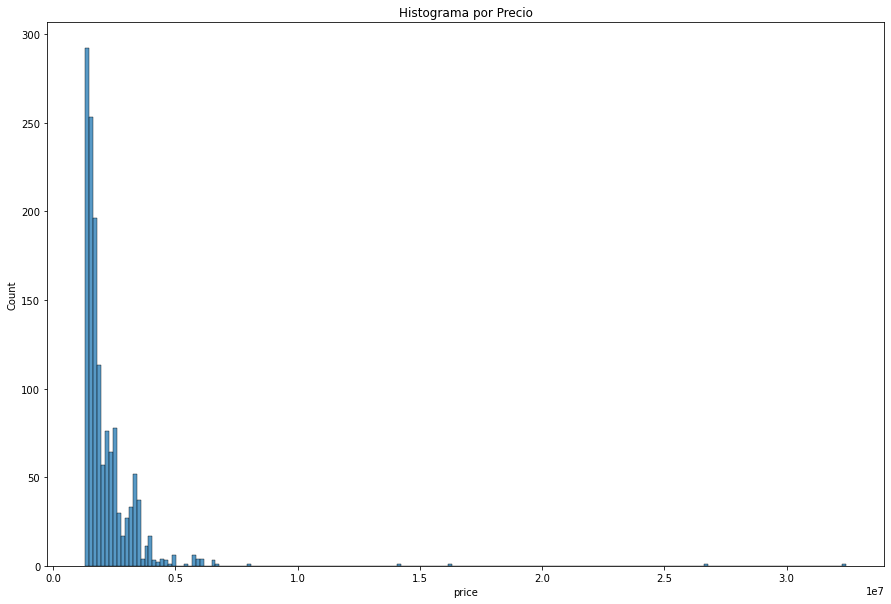

In [44]:
plt.figure(figsize=(15,10))
sns.histplot(propdf3['price'])
plt.title('Histograma por Precio')
plt.show()

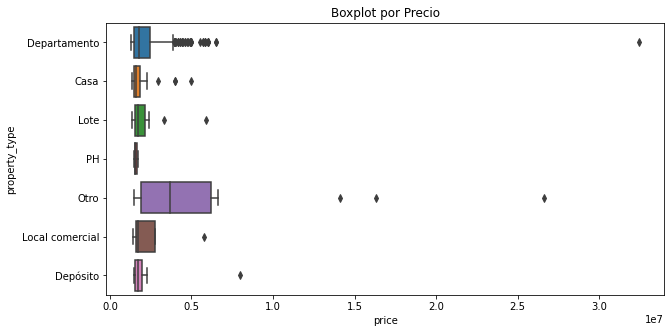

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price', y='property_type',data=propdf3)
plt.title('Boxplot por Precio')
plt.show()

Se descartaron más de 90mil filas de datos. Es mucho. La muestra quedaría muy sesgada. 

In [31]:
#Prueba por rango intercuartilico
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out_price = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out_price

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

In [32]:
get_iqr_values(propdf2, 'price')
get_iqr_text(propdf2, 'price')

'median=175000.00, q1=120000.00, q3=279000.00, iqr=159000.00, minimum=-118500.00, maximum=517500.00'

In [33]:
df_out = remove_outliers(propdf2, 'price')

C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


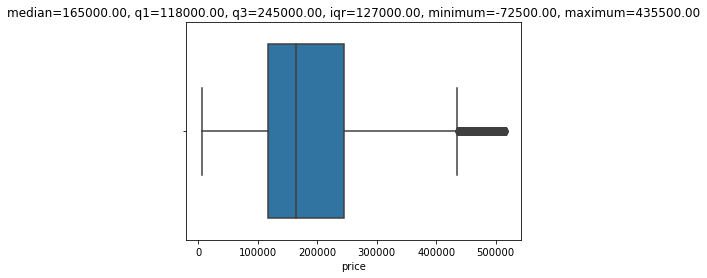

In [34]:
box_and_whisker(df_out, 'price')

In [35]:
df_out.shape

(84836, 11)

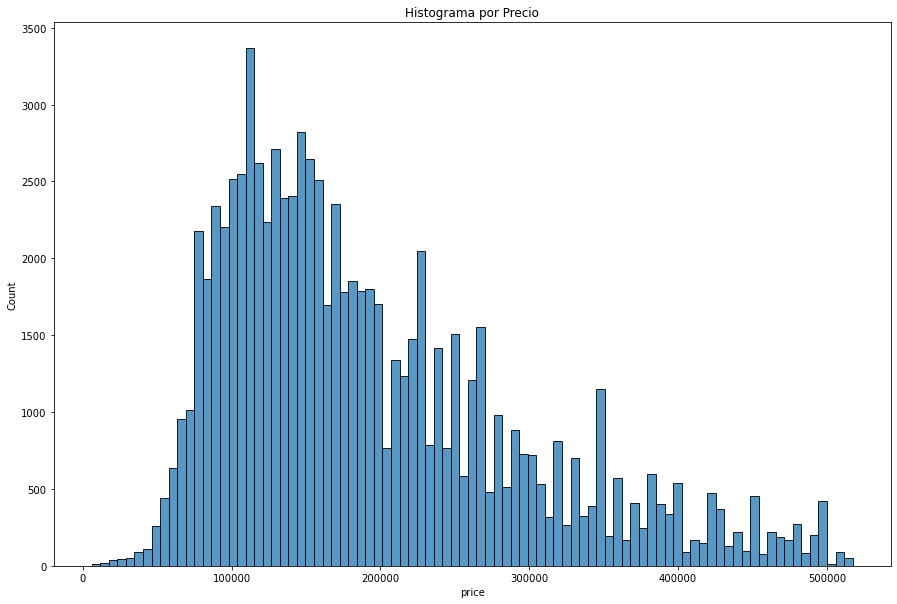

In [90]:
plt.figure(figsize=(15,10))
sns.histplot(df_out['price'])
plt.title('Histograma por Precio')
plt.show()

Obtengo un filtrado del data set más razonable, que no me elimina tantas filas como el primer intento. Todavía no formalizo el dataset final. Continuo trabajando los outliers del resto de los features. 

In [91]:
#Filtrado para superficie cubierta. 
get_iqr_values(propdf2, 'surface_covered')
get_iqr_text(propdf2, 'surface_covered')

'median=60.00, q1=46.00, q3=92.00, iqr=46.00, minimum=-23.00, maximum=161.00'

In [92]:
df_out = remove_outliers(propdf2, 'surface_covered')

C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


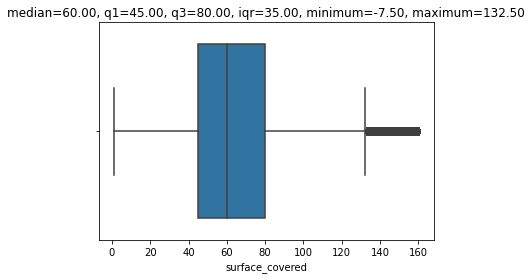

In [93]:
box_and_whisker(df_out, 'surface_covered')

In [78]:
df_out.shape

(84983, 11)

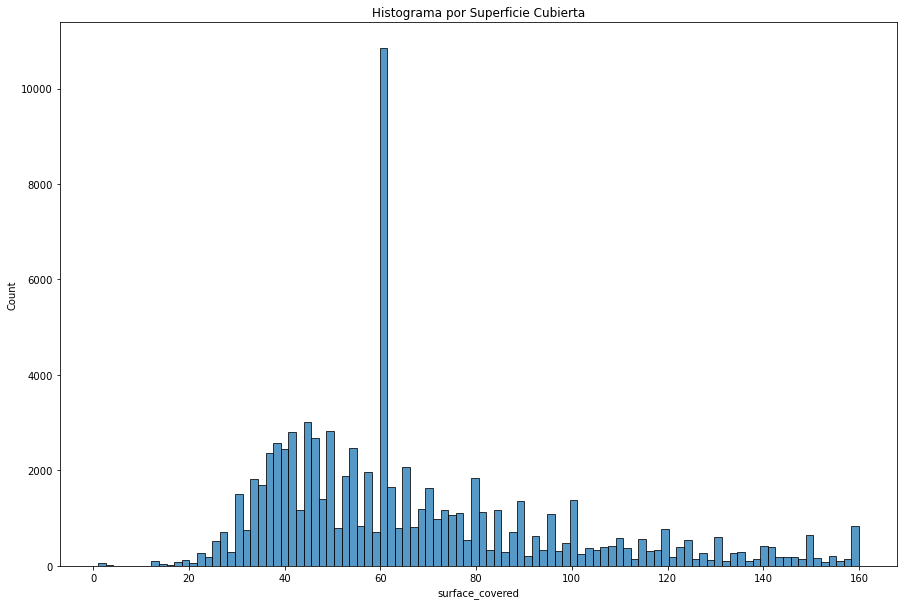

In [94]:
plt.figure(figsize=(15,10))
sns.histplot(df_out['surface_covered'])
plt.title('Histograma por Superficie Cubierta')
plt.show()

In [79]:
#Filtrado por baños
get_iqr_values(propdf2, 'bathrooms')
get_iqr_text(propdf2, 'bathrooms')

'median=1.00, q1=1.00, q3=2.00, iqr=1.00, minimum=-0.50, maximum=3.50'

In [95]:
df_out = remove_outliers(propdf2, 'bathrooms')

C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


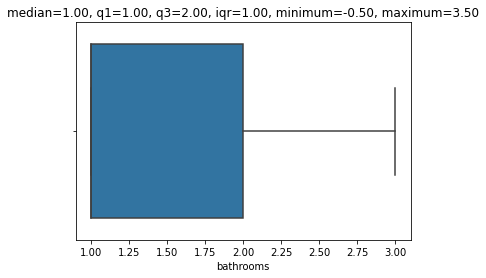

In [96]:
box_and_whisker(df_out, 'bathrooms')

In [82]:
df_out.shape

(89201, 11)

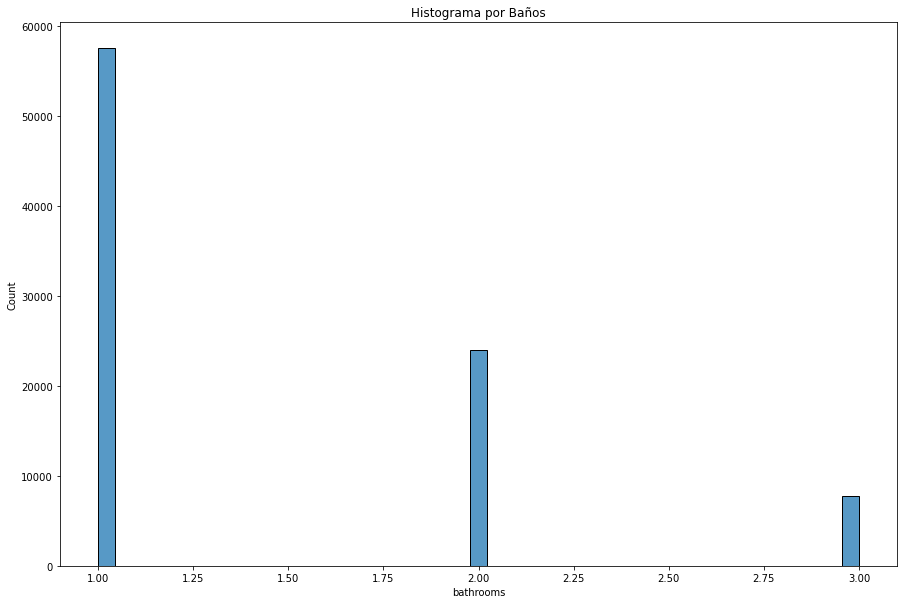

In [97]:
plt.figure(figsize=(15,10))
sns.histplot(df_out['bathrooms'])
plt.title('Histograma por Baños')
plt.show()

In [98]:
#Filtrado para habitaciones. 
get_iqr_values(propdf2, 'rooms')
get_iqr_text(propdf2, 'rooms')

'median=3.00, q1=2.00, q3=4.00, iqr=2.00, minimum=-1.00, maximum=7.00'

In [99]:
df_out = remove_outliers(propdf2, 'rooms')

C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


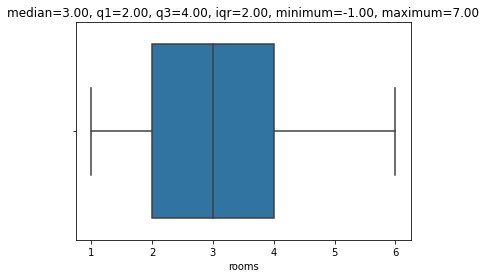

In [100]:
box_and_whisker(df_out, 'rooms')

In [86]:
df_out.shape

(91092, 11)

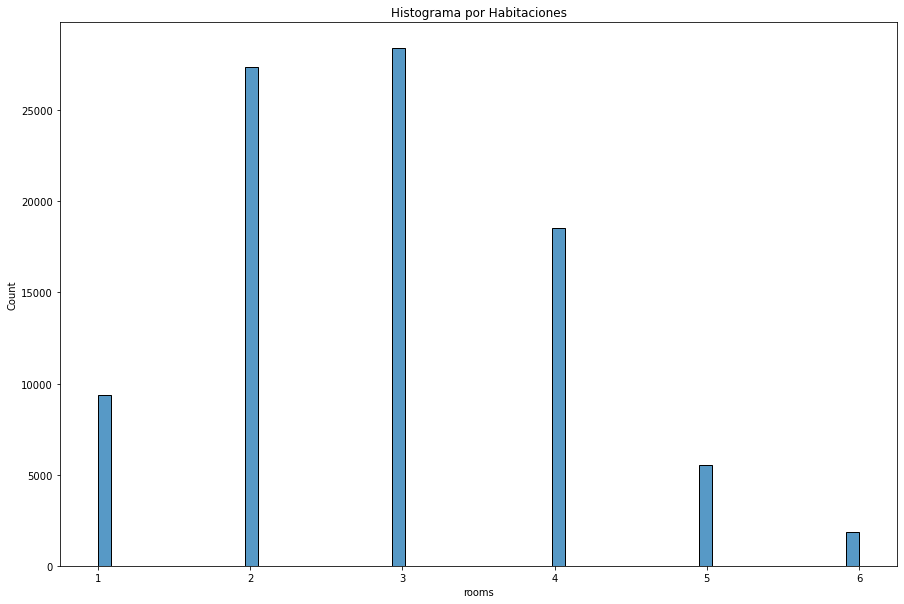

In [101]:
plt.figure(figsize=(15,10))
sns.histplot(df_out['rooms'])
plt.title('Histograma por Habitaciones')
plt.show()

In [37]:
propdf2.shape

(92539, 11)

In [33]:
#Filtro y compilado del dataset
#superficie = np.logical_and(propdf2.surface_covered<=161,propdf2.surface_covered>=23)
#porbanos = np.logical_and(propdf2.bathrooms<=4,propdf2.bathrooms>=0)
#porhab = np.logical_and(propdf2.rooms<=7,propdf2.rooms>=1)
#porprecio = np.logical_and(superficie==True,propdf2.price<=517500) #,propdf2.price>=118500

In [ ]:
#Filtro del dataset 
#filtro = np.logical_and(porbanos, porhab, porprecio)
#ds_ml = propdf2[filtro]

In [ ]:
#Las funciones anteriores no están funcionando y están restaurando el kernel todo el tiempo. Se prueba con otro filtrado

## Filtrado definitivo

In [32]:
superficie = propdf2[(propdf2.surface_covered >= 23) & (propdf['surface_covered'] <= 161)]

C:\Users\Gasto\AppData\Local\Temp/ipykernel_15680/626773156.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  superficie = propdf2[(propdf2.surface_covered >= 23) & (propdf['surface_covered'] <= 161)]


In [33]:
superficie.shape

(84421, 11)

In [34]:
porbaños = superficie[(superficie.bathrooms >= 0) & (superficie['bathrooms'] <= 4)]

In [35]:
porbaños.shape

(84245, 11)

In [36]:
porhab = porbaños[(porbaños.rooms >= 1) & (porbaños['rooms'] <= 7)]

In [37]:
porhab.shape

(84155, 11)

In [38]:
porhab.head()

,property_type,Barrio,index,lat,lon,País,Localidad,rooms,bathrooms,surface_covered,price
0,Departamento,San Cristobal,0,-34.605880,-58.384949,Argentina,Capital Federal,7.0,2.0,140.0,153000.0
1,PH,Boedo,1,-34.624056,-58.412110,Argentina,Capital Federal,2.0,2.0,58.0,159000.0
2,PH,Palermo,2,-34.593569,-58.427474,Argentina,Capital Federal,2.0,1.0,45.0,125000.0
3,PH,Palermo,3,-34.581294,-58.436754,Argentina,Capital Federal,2.0,1.0,50.0,295000.0
5,PH,Villa Crespo,5,-34.593779,-58.441239,Argentina,Capital Federal,2.0,1.0,56.0,150000.0


In [39]:
propfinal = porhab[(porhab.price >= 118500) & (porhab['price'] <= 517500)]

In [40]:
#propfinal = propdf2[(propdf2.price >= 118500) & (propdf2['price'] <= 517500)]

In [41]:
propfinal.shape

(60357, 11)

Se obtuvo un dataset con 20 mil filas menos que en el proyecto 01. 

In [42]:
propfinal.describe()

,index,lat,lon,rooms,bathrooms,surface_covered,price
count,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000
mean,71341.828388,-34.596244,-58.437481,3.016419,1.497937,72.897013,220241.802972
std,42079.580968,0.023108,0.034383,0.985234,0.672384,28.644515,87883.855978
min,0.000000,-34.696419,-58.530468,1.000000,1.000000,23.000000,118500.000000
25%,34330.000000,-34.610000,-58.459161,2.000000,1.000000,53.000000,150000.000000
50%,70797.000000,-34.596810,-58.434258,3.000000,1.000000,64.000000,195000.000000
75%,107442.000000,-34.581765,-58.414350,4.000000,2.000000,87.000000,265000.000000
max,146557.000000,-34.535818,-58.353930,7.000000,4.000000,161.000000,517266.000000


In [43]:
propfinal = propfinal.drop(columns=['País','Localidad','index'], axis=1)

propfinal.head(2)

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0


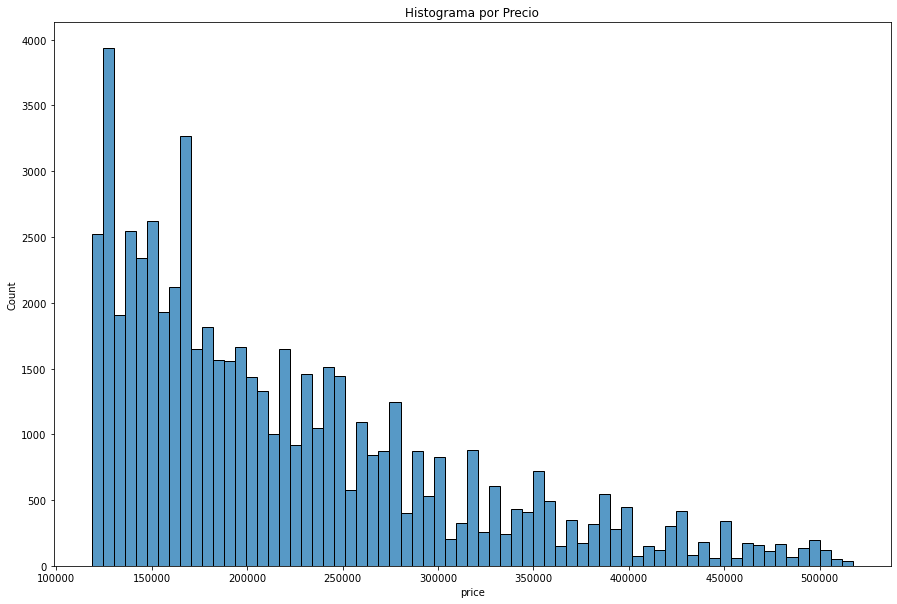

In [46]:
plt.figure(figsize=(15,10))
sns.histplot(propfinal['price'])
plt.title('Histograma por Precio')
plt.show()

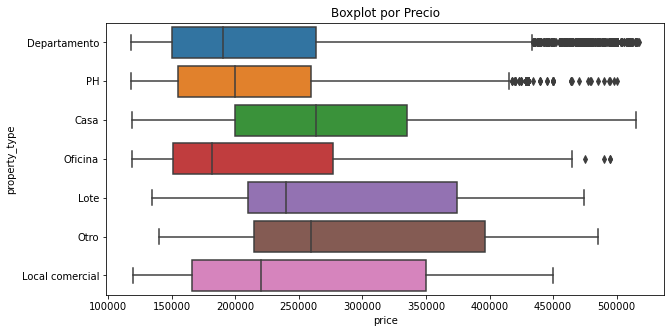

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price', y='property_type',data=propfinal)
plt.title('Boxplot por Precio')
plt.show()

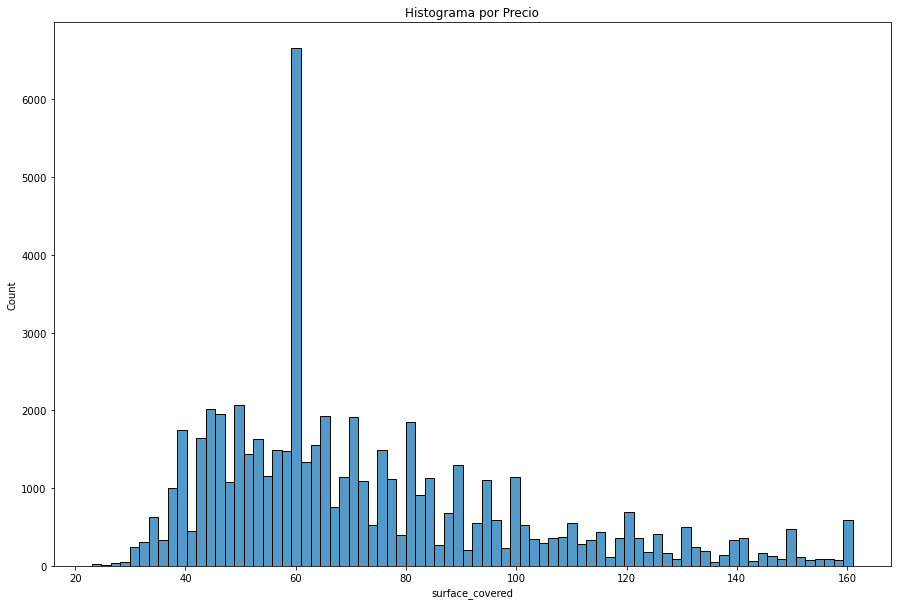

In [53]:
plt.figure(figsize=(15,10))
sns.histplot(propfinal['surface_covered'])
plt.title('Histograma por Precio')
plt.show()

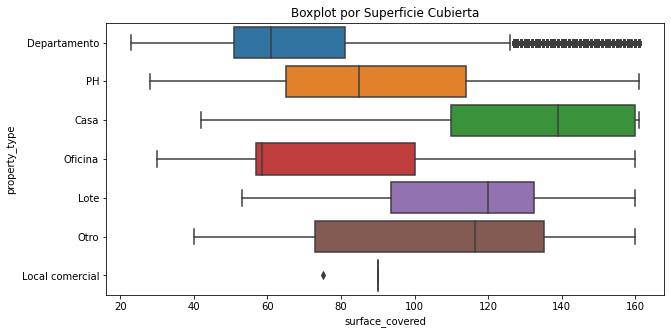

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(x='surface_covered', y='property_type',data=propfinal)
plt.title('Boxplot por Superficie Cubierta')
plt.show()

Text(0.5, 1.0, 'Q por tipo de propiedad')

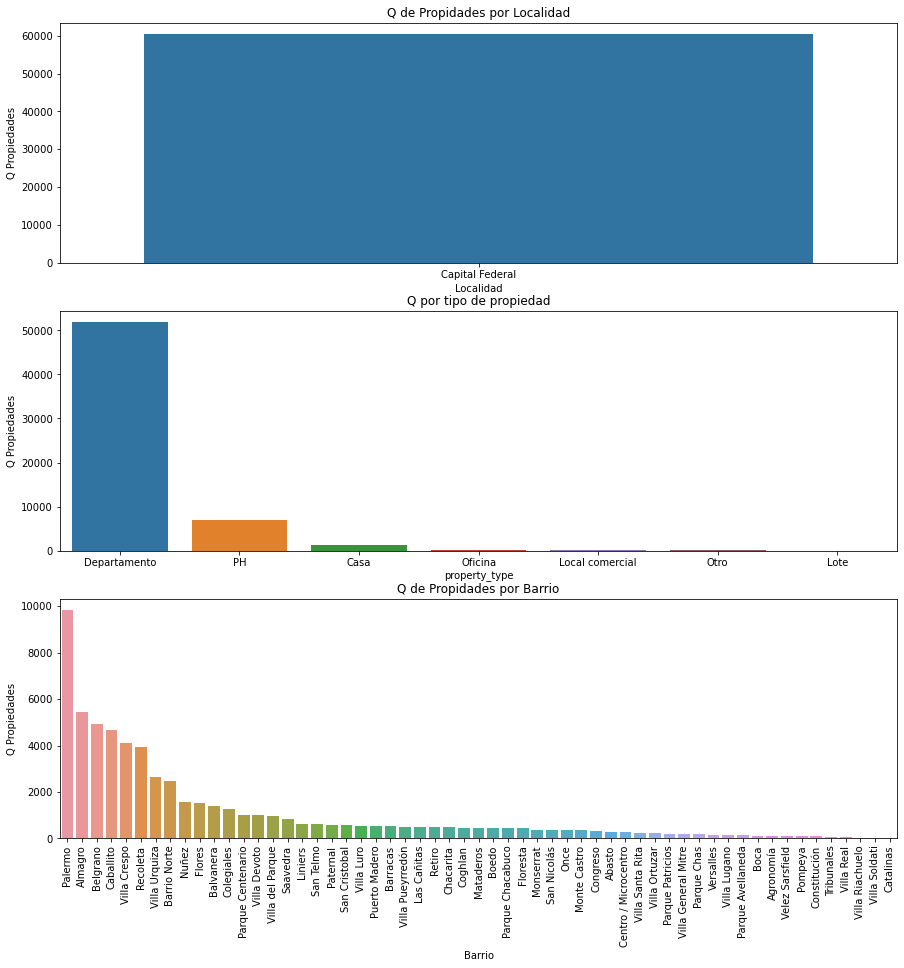

In [87]:
#Orden por Localidad
loc_prop = propfinal['Localidad'].value_counts()
orden_loc = loc_prop.index

#Orden por Barrio
barr_prop = propfinal['Barrio'].value_counts()
orden_barr = barr_prop.index

#Orden por tipo de propiedad
tip_prop = propfinal['property_type'].value_counts()
orden_prop = tip_prop.index

#Tamaño del gráfico
plt.figure(figsize = (15,15))

plt.subplot(3,1,1)
sns.countplot(data = propfinal, x = 'Localidad', order = orden_loc)
plt.xticks(rotation=0)
plt.xlabel('Localidad')
plt.ylabel('Q Propiedades')
plt.title('Q de Propidades por Localidad')

plt.subplot(3,1,3)
sns.countplot(data = propfinal, x = 'Barrio', order = orden_barr)
plt.xticks(rotation=90)
plt.xlabel('Barrio')
plt.ylabel('Q Propiedades')
plt.title('Q de Propidades por Barrio')

plt.subplot(3,1,2)
sns.countplot(data = propfinal, x = 'property_type', order = orden_prop)
plt.xticks(rotation=0)
plt.xlabel('property_type')
plt.ylabel('Q Propiedades')
plt.title('Q por tipo de propiedad')

Si bien la muestra parace más sesgada para casa otras propiedades que no sean departamentos, la cantidad de departamentos publicados para capital federeal sigue siendo muy superior por sobre el resto por lo que asumo que los valores filtrados son aceptables. Defino que es mi dataset definitivo.

In [44]:
propfinal.describe()

,lat,lon,rooms,bathrooms,surface_covered,price
count,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000
mean,-34.596244,-58.437481,3.016419,1.497937,72.897013,220241.802972
std,0.023108,0.034383,0.985234,0.672384,28.644515,87883.855978
min,-34.696419,-58.530468,1.000000,1.000000,23.000000,118500.000000
25%,-34.610000,-58.459161,2.000000,1.000000,53.000000,150000.000000
50%,-34.596810,-58.434258,3.000000,1.000000,64.000000,195000.000000
75%,-34.581765,-58.414350,4.000000,2.000000,87.000000,265000.000000
max,-34.535818,-58.353930,7.000000,4.000000,161.000000,517266.000000


In [45]:
propfinal.shape

(60357, 8)

Con el dataset final con el que puedo trabajar, evalúo hacer un escalado de datos ya que habitaciones y baños son unidades comparables entre sí, pero superficie cubierta dista de los otros dos. Si quiero mejorar el modelo 02 respecto del 01, reescalare los features para que sean más homogeneos entre sí a la hora de ser procesados por un modelo ML. 

## RE-ESCALADO DE DATOS

In [46]:
VM_Surface = propfinal.surface_covered.mean()
std_Surface = propfinal.surface_covered.std()
propfinal['re_surface'] = (propfinal.surface_covered - VM_Surface)/std_Surface
propfinal.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,re_surface
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,2.342612
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,-0.520065
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,-0.973904
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,-0.799351
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,-0.589886


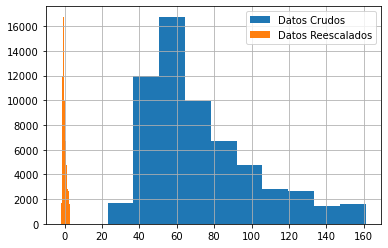

In [47]:
propfinal.surface_covered.hist(label = 'Datos Crudos')
propfinal.re_surface.hist(label = 'Datos Reescalados')
plt.legend()
plt.show()

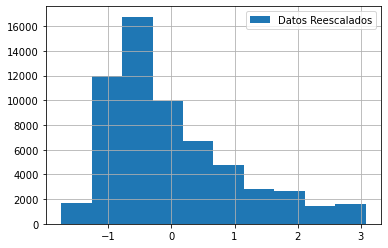

In [48]:
propfinal.re_surface.hist(label = 'Datos Reescalados')
plt.legend()
plt.show()

Si comparo las dos distribucione entre sí, por las diferencias de escalas pareciera que no son semejantes. Ahora, cuando quito el label del dato original y dejo solo los datos reescalados, encuentro que la distrubución es semejante, por lo tanto el reescalado ha funcionado. 

In [49]:
VM_rooms = propfinal.rooms.mean()
std_rooms = propfinal.rooms.std()
propfinal['re_rooms'] = (propfinal.rooms - VM_rooms)/std_rooms
propfinal.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,re_surface,re_rooms
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,2.342612,4.043284
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,-0.520065,-1.031652
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,-0.973904,-1.031652
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,-0.799351,-1.031652
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,-0.589886,-1.031652


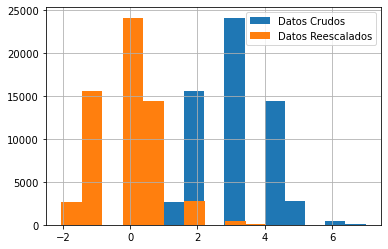

In [50]:
propfinal.rooms.hist(label = 'Datos Crudos')
propfinal.re_rooms.hist(label = 'Datos Reescalados')
plt.legend()
plt.show()

En este caso como las escalas son similares, ambos gráficos son simétricos entre sí. Decido reescalar también habitaciones y baños ya que superficie cubierta reescalada contempla valores negativos y no quiero que los modelos de ML interpreten que un valor negativo de superficie cubierta sea más chico que un baño o una habitación. Por lo tanto reescalo los valores. 

In [51]:
VM_bathrooms = propfinal.bathrooms.mean()
std_bathrooms = propfinal.bathrooms.std()
propfinal['re_bathrooms'] = (propfinal.bathrooms - VM_bathrooms)/std_rooms
propfinal.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,re_surface,re_rooms,re_bathrooms
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,2.342612,4.043284,0.509587
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,-0.520065,-1.031652,0.509587
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,-0.973904,-1.031652,-0.505400
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,-0.799351,-1.031652,-0.505400
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,-0.589886,-1.031652,-0.505400


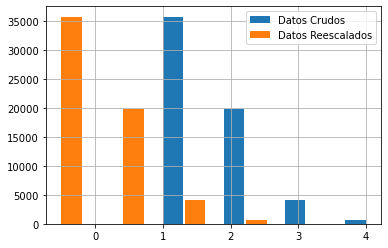

In [52]:
propfinal.bathrooms.hist(label = 'Datos Crudos')
propfinal.re_bathrooms.hist(label = 'Datos Reescalados')
plt.legend()
plt.show()

Nuevamente respeta la distribución, por lo que es aceptable. 

In [53]:
propfinal.shape

(60357, 11)

Por último, elijo codificar las etiquetas de las propiedades para facilitar los procesamientos de los modelos de ML. Pueden funcionar o no, lo veré según los modelos más adelantes, pero dejo preparado el dataset para ellos. 

## ENCODERS

In [54]:
property_type_dummies = pd.get_dummies(propfinal.property_type, prefix='property_type')

In [55]:
propfinal = pd.concat([propfinal, property_type_dummies], axis=1)

In [56]:
propfinal.shape

(60357, 18)

In [57]:
propfinal.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,re_surface,re_rooms,re_bathrooms,property_type_Casa,property_type_Departamento,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,2.342612,4.043284,0.509587,0,1,0,0,0,0,0
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,-0.520065,-1.031652,0.509587,0,0,0,0,0,0,1
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,-0.973904,-1.031652,-0.505400,0,0,0,0,0,0,1
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,-0.799351,-1.031652,-0.505400,0,0,0,0,0,0,1
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,-0.589886,-1.031652,-0.505400,0,0,0,0,0,0,1


Tal cual lo esperado, codificar las etiquetas de las propiedades agranda el dataset en cantidad de columnas. Evaluaré esto a la hora de implementar los modelos. En principio, antes de utilizar los modelos avanzados, utilizaré este dataset para comparar el desempeño del modelo 01. 

## COMPARACION DE MODELOS - 01 vs 02

## Modelo 01

In [60]:
#Replico el dataset 01:
properaty.head(2)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta


In [99]:
properaty01 = properaty.rename(columns={'l2':'Localidad','l3':'Barrio','l1':'País'})

In [100]:
properaty01.head(2)

,start_date,end_date,created_on,lat,lon,País,Localidad,Barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta


In [102]:
#Replico el dataset 01:
superficie = np.logical_and(properaty01.surface_total<=1000,properaty01.surface_total>=15)
porzona = np.logical_and(properaty01.Localidad=='Capital Federal',properaty01['property_type'].isin(['Departamento','PH','Casa']))
porprecio = np.logical_and(superficie==True,properaty01.price<=4000000) 

#Filtro del dataset 
filtro = np.logical_and(porzona, porprecio)
ds_ml = properaty01[filtro]

#Test Checkpoint
ds_ml = ds_ml[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]
ds_ml = ds_ml.dropna()
if ds_ml.shape == (81019, 6):
    print(ds_ml.shape)
    print('Checkpoint logrado con éxito')

(81019, 6)
Checkpoint logrado con éxito


In [103]:
ds_ml.shape

(81019, 6)

In [104]:
ds_ml.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81019.000000,81019.000000,81019.000000,81019.000000,81019.000000,8.101900e+04
mean,3.009652,2.002037,1.553821,95.361779,84.928535,2.637725e+05
std,1.308602,1.049673,0.852672,77.253578,156.133119,2.989499e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


In [105]:
X= ds_ml[['bathrooms', 'surface_covered']]
y = ds_ml.price



In [106]:
#Diseño el modelo de train y test 01
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [114]:
#Defino los modelos de ML
modelo_lineal1 = LinearRegression()
arbol_regresor1 = DecisionTreeRegressor(max_depth=8, random_state=42)
vecinos_regresor1 = KNeighborsRegressor(n_neighbors=20)

In [115]:
#Entreno los modelos 01
modelo_lineal1.fit(X_train, y_train)
arbol_regresor1.fit(X_train, y_train)
vecinos_regresor1.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 224663.3332314654
Raíz del error cuadrático medio en Test: 233239.51906164348


C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


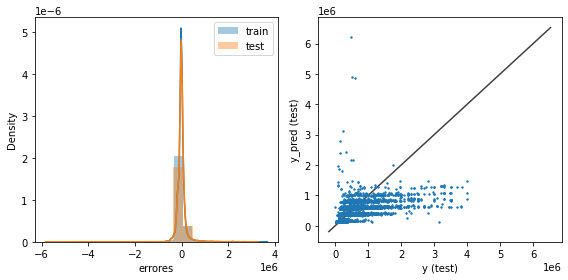

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 157623.12500047687
Raíz del error cuadrático medio en Test: 171054.90547290823


C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


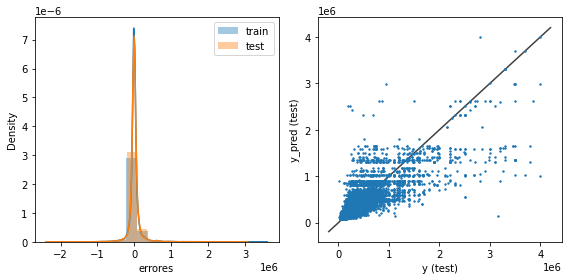

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 165887.97302118017
Raíz del error cuadrático medio en Test: 177519.78481592747


C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


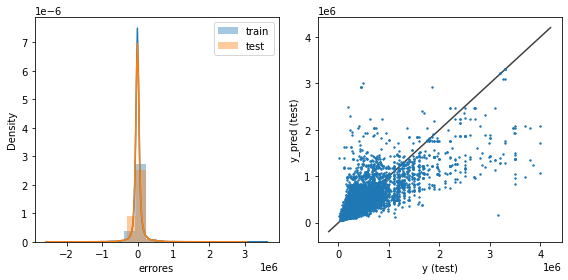

In [116]:
#Vuelvo a graficar las métricas de los modelos 01
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([modelo_lineal1, arbol_regresor1, vecinos_regresor1]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

En el primer modelo de ML mis conclusiones fueron: 

    1.	Luego de modificar los modelos de clasificación por los de regresión, se volvió a entrenar y comparar los modelos. Tras ellos, se modificaron los hiperparametros para tratar de lograr una reducción del error medio. De los tres modelos, se elije el modelo de Árbol de Decisión (arbol_regresor2), ya que logró el menor error cuadrático medio tanto en Train como en Test. 
    
    2.	Aunque los errores se aproximan, no llegan a ser similares lo que indica que el modelo puede estar sobre ajustando. Si se observan las gráficas Y_Pred sobre Y_Test se puede observar que entre 0 y 100 mil, el modelo pareciera aproximar de forma similar, pero por arriba de ese valor, el modelo empieza a tener distancias mayores entre los puntos y empieza a ser más impreciso. 

## Modelo 02

In [62]:
propfinal.head(2)

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,re_surface,re_rooms,re_bathrooms,property_type_Casa,property_type_Departamento,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,2.342612,4.043284,0.509587,0,1,0,0,0,0,0
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,-0.520065,-1.031652,0.509587,0,0,0,0,0,0,1


In [119]:
X= propfinal[['re_bathrooms', 're_rooms', 're_surface', 'property_type_Casa', 'property_type_Departamento', 'property_type_Local comercial', 'property_type_Lote', 'property_type_Oficina', 'property_type_Otro', 'property_type_PH']]
y = propfinal.price


In [120]:
#Diseño el modelo de train y test 02
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [121]:
#Defino los modelos de ML con los mismos hiperparámetros que en los modelos 01
modelo_lineal2 = LinearRegression()
arbol_regresor2 = DecisionTreeRegressor(max_depth=8, random_state=42)
vecinos_regresor2 = KNeighborsRegressor(n_neighbors=20)

In [123]:
#Vuelvo a entrenar los modelos
modelo_lineal2.fit(X_train, y_train)
arbol_regresor2.fit(X_train, y_train)
vecinos_regresor2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 62006.98538093346
Raíz del error cuadrático medio en Test: 62351.14725644972


C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


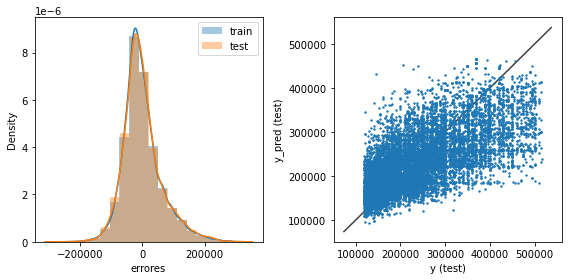

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 56953.12335769007
Raíz del error cuadrático medio en Test: 58194.197951944945


C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


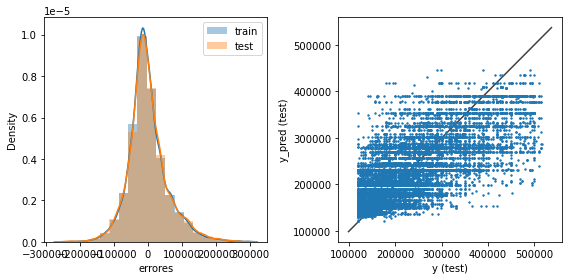

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 55863.01665093252
Raíz del error cuadrático medio en Test: 57424.708572408235


C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


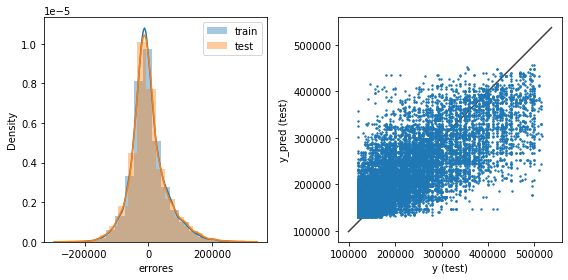

In [124]:
#Vuelvo a graficar las métricas de los modelos
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([modelo_lineal2, arbol_regresor2, vecinos_regresor2]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

## Primeras conclusiones: 
1. En el primer modelo elegí el modelo de arbol de decisión por tener el menor error entre los 3 modelos testeados. En aquella oportunidad, y tal como quedó reflejado en la repetición del modelo, su RMSE fue de 165887.97 para train y 177519.78 para test. Con el tratado y depurado del dataset se volvieron a entrenar los 3 modelos y nuevamente el árbol de decisión vuelve a tener el menor error entre los 3, por un valor de 55863.01 para train y 57424.70 para test. El error se vio reducido en 120 mil unidades, siendo un cambio que puedo considerar como drástico.
2. Otra cuestión a considerar es que el dataset utilizado en esta oportunidad contó con 20 mil filas menos de datos respecto del primer dataset. Con las columnas sucedió algo parecido, solo que en vez de reducirse se vieron aumentadas, sobre todo por las codificaciones de los tipos de propiedades.
3. En este primer testing de los modelos no he considerado utilizar los datos de las localidades de las viviendas. Presumo en esta instancia que si puedo condificar dicha información pueda obtener un poco más de la reducción del modelo. Trabajaré una instancia más el dataset y volveré a testear el modelo antes de cerrar las conclusiones de la parte A. 

In [56]:
propfinal.head(2)

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,re_surface,re_rooms,re_bathrooms,property_type_Casa,property_type_Departamento,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,2.342612,4.043284,0.509587,0,1,0,0,0,0,0
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,-0.520065,-1.031652,0.509587,0,0,0,0,0,0,1


In [58]:
propfinal['pricem2']=propfinal["price"]/propfinal["surface_covered"]

In [59]:
propfinal.head(2)

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,re_surface,re_rooms,re_bathrooms,property_type_Casa,property_type_Departamento,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH,pricem2
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,2.342612,4.043284,0.509587,0,1,0,0,0,0,0,1092.857143
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,-0.520065,-1.031652,0.509587,0,0,0,0,0,0,1,2741.379310


In [60]:
#RE ESCALO LAT, LON y PRICEM2 
VM_pricem2 = propfinal.pricem2.mean()
std_pricem2 = propfinal.pricem2.std()
propfinal['re_pricem2'] = (propfinal.pricem2 - VM_pricem2)/std_pricem2
propfinal.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,re_surface,re_rooms,re_bathrooms,property_type_Casa,property_type_Departamento,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH,pricem2,re_pricem2
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,2.342612,4.043284,0.509587,0,1,0,0,0,0,0,1092.857143,-2.083930
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,-0.520065,-1.031652,0.509587,0,0,0,0,0,0,1,2741.379310,-0.423050
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,-0.973904,-1.031652,-0.505400,0,0,0,0,0,0,1,2777.777778,-0.386379
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,-0.799351,-1.031652,-0.505400,0,0,0,0,0,0,1,5900.000000,2.759248
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,-0.589886,-1.031652,-0.505400,0,0,0,0,0,0,1,2678.571429,-0.486329


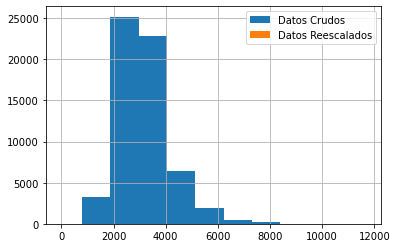

In [61]:
#Testeo sus distribuciones 
propfinal.pricem2.hist(label = 'Datos Crudos')
propfinal.re_pricem2.hist(label = 'Datos Reescalados')
plt.legend()
plt.show()

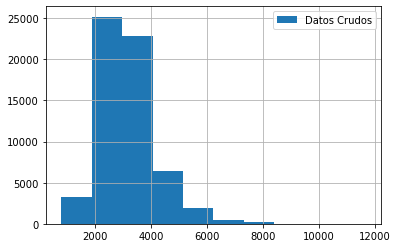

In [62]:
propfinal.pricem2.hist(label = 'Datos Crudos')
plt.legend()
plt.show()

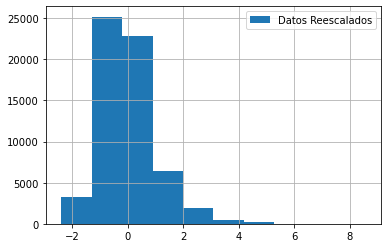

In [63]:
propfinal.re_pricem2.hist(label = 'Datos Reescalados')
plt.legend()
plt.show()

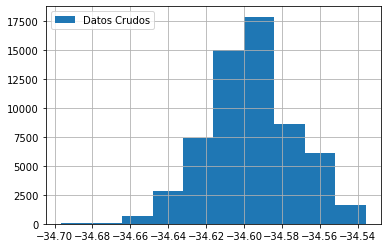

In [64]:
#Antes de modificar LAT y LON quiero ver sus distribuciones 
propfinal.lat.hist(label = 'Datos Crudos')
plt.legend()
plt.show()

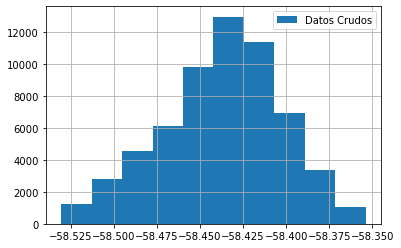

In [65]:
propfinal.lon.hist(label = 'Datos Crudos')
plt.legend()
plt.show()

In [66]:
VM_lat = propfinal.lat.mean()
std_lat = propfinal.lat.std()
propfinal['re_lat'] = (propfinal.lat - VM_lat)/std_lat
propfinal.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,re_surface,re_rooms,...,property_type_Casa,property_type_Departamento,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH,pricem2,re_pricem2,re_lat
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,2.342612,4.043284,...,0,1,0,0,0,0,0,1092.857143,-2.083930,-0.416985
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,-0.520065,-1.031652,...,0,0,0,0,0,0,1,2741.379310,-0.423050,-1.203556
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,-0.973904,-1.031652,...,0,0,0,0,0,0,1,2777.777778,-0.386379,0.115774
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,-0.799351,-1.031652,...,0,0,0,0,0,0,1,5900.000000,2.759248,0.646980
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,-0.589886,-1.031652,...,0,0,0,0,0,0,1,2678.571429,-0.486329,0.106684


In [67]:
VM_lon = propfinal.lon.mean()
std_lon = propfinal.lon.std()
propfinal['re_lon'] = (propfinal.lon - VM_lon)/std_lon
propfinal.head()

,property_type,Barrio,lat,lon,rooms,bathrooms,surface_covered,price,re_surface,re_rooms,...,property_type_Departamento,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH,pricem2,re_pricem2,re_lat,re_lon
0,Departamento,San Cristobal,-34.605880,-58.384949,7.0,2.0,140.0,153000.0,2.342612,4.043284,...,1,0,0,0,0,0,1092.857143,-2.083930,-0.416985,1.527845
1,PH,Boedo,-34.624056,-58.412110,2.0,2.0,58.0,159000.0,-0.520065,-1.031652,...,0,0,0,0,0,1,2741.379310,-0.423050,-1.203556,0.737882
2,PH,Palermo,-34.593569,-58.427474,2.0,1.0,45.0,125000.0,-0.973904,-1.031652,...,0,0,0,0,0,1,2777.777778,-0.386379,0.115774,0.291035
3,PH,Palermo,-34.581294,-58.436754,2.0,1.0,50.0,295000.0,-0.799351,-1.031652,...,0,0,0,0,0,1,5900.000000,2.759248,0.646980,0.021129
5,PH,Villa Crespo,-34.593779,-58.441239,2.0,1.0,56.0,150000.0,-0.589886,-1.031652,...,0,0,0,0,0,1,2678.571429,-0.486329,0.106684,-0.109308


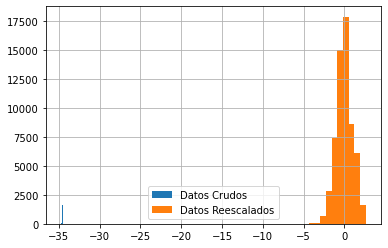

In [68]:
#Comparo districuciones
propfinal.lat.hist(label = 'Datos Crudos')
propfinal.re_lat.hist(label = 'Datos Reescalados')
plt.legend()
plt.show()

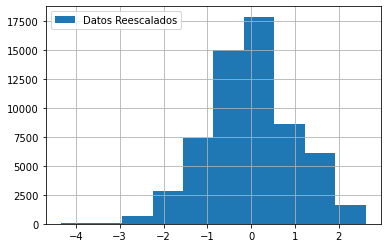

In [69]:
#Por la diferencia de los datos, visualmente es dificil compararlos
propfinal.re_lat.hist(label = 'Datos Reescalados')
plt.legend()
plt.show()

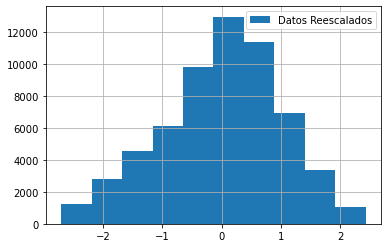

In [70]:
propfinal.re_lon.hist(label = 'Datos Reescalados')
plt.legend()
plt.show()

In [71]:
#Por último, codifico el barrio para que también ser interpretado por el modelo.
barrios_dummies = pd.get_dummies(propfinal.Barrio, prefix='barrio')

In [72]:
propfinal = pd.concat([propfinal, barrios_dummies], axis=1)

In [73]:
propfinal.shape

(60357, 79)

Como era de esperarse, codificando los barrios hubo un crecimiento abrupto de columnas.

In [74]:
propfinal. describe()

,lat,lon,rooms,bathrooms,surface_covered,price,re_surface,re_rooms,re_bathrooms,property_type_Casa,...,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque
count,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,6.035700e+04,6.035700e+04,6.035700e+04,60357.000000,...,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000,60357.000000
mean,-34.596244,-58.437481,3.016419,1.497937,72.897013,220241.802972,-7.534293e-18,-1.318501e-16,3.767147e-17,0.020478,...,0.002237,0.008847,0.003678,0.008499,0.001276,0.000331,0.004092,0.000166,0.043591,0.015740
std,0.023108,0.034383,0.985234,0.672384,28.644515,87883.855978,1.000000e+00,1.000000e+00,6.824616e-01,0.141630,...,0.047241,0.093644,0.060536,0.091800,0.035695,0.018200,0.063841,0.012871,0.204184,0.124468
min,-34.696419,-58.530468,1.000000,1.000000,23.000000,118500.000000,-1.741940e+00,-2.046640e+00,-5.054000e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-34.610000,-58.459161,2.000000,1.000000,53.000000,150000.000000,-6.946186e-01,-1.031652e+00,-5.054000e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-34.596810,-58.434258,3.000000,1.000000,64.000000,195000.000000,-3.106009e-01,-1.666505e-02,-5.054000e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-34.581765,-58.414350,4.000000,2.000000,87.000000,265000.000000,4.923451e-01,9.983222e-01,5.095873e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,-34.535818,-58.353930,7.000000,4.000000,161.000000,517266.000000,3.075737e+00,4.043284e+00,2.539562e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
propfinal.columns

Index(['property_type', 'Barrio', 'lat', 'lon', 'rooms', 'bathrooms',
       'surface_covered', 'price', 're_surface', 're_rooms', 're_bathrooms',
       'property_type_Casa', 'property_type_Departamento',
       'property_type_Local comercial', 'property_type_Lote',
       'property_type_Oficina', 'property_type_Otro', 'property_type_PH',
       'pricem2', 're_pricem2', 're_lat', 're_lon', 'barrio_Abasto',
       'barrio_Agronomía', 'barrio_Almagro', 'barrio_Balvanera',
       'barrio_Barracas', 'barrio_Barrio Norte', 'barrio_Belgrano',
       'barrio_Boca', 'barrio_Boedo', 'barrio_Caballito', 'barrio_Catalinas',
       'barrio_Centro / Microcentro', 'barrio_Chacarita', 'barrio_Coghlan',
       'barrio_Colegiales', 'barrio_Congreso', 'barrio_Constitución',
       'barrio_Flores', 'barrio_Floresta', 'barrio_Las Cañitas',
       'barrio_Liniers', 'barrio_Mataderos', 'barrio_Monserrat',
       'barrio_Monte Castro', 'barrio_Nuñez', 'barrio_Once', 'barrio_Palermo',
       'barrio_Parque A

In [76]:
X= propfinal[['re_bathrooms', 're_rooms', 're_surface', 'property_type_Casa', 'property_type_Departamento', 'property_type_Local comercial', 'property_type_Lote', 'property_type_Oficina', 'property_type_Otro', 'property_type_PH', 're_pricem2', 're_lat', 're_lon', 'barrio_Abasto','barrio_Agronomía', 'barrio_Almagro', 'barrio_Balvanera','barrio_Barracas', 'barrio_Barrio Norte', 'barrio_Belgrano','barrio_Boca', 'barrio_Boedo', 'barrio_Caballito', 'barrio_Catalinas',
       'barrio_Centro / Microcentro', 'barrio_Chacarita', 'barrio_Coghlan',
       'barrio_Colegiales', 'barrio_Congreso', 'barrio_Constitución',
       'barrio_Flores', 'barrio_Floresta', 'barrio_Las Cañitas',
       'barrio_Liniers', 'barrio_Mataderos', 'barrio_Monserrat',
       'barrio_Monte Castro', 'barrio_Nuñez', 'barrio_Once', 'barrio_Palermo',
       'barrio_Parque Avellaneda', 'barrio_Parque Centenario',
       'barrio_Parque Chacabuco', 'barrio_Parque Chas',
       'barrio_Parque Patricios', 'barrio_Paternal', 'barrio_Pompeya',
       'barrio_Puerto Madero', 'barrio_Recoleta', 'barrio_Retiro',
       'barrio_Saavedra', 'barrio_San Cristobal', 'barrio_San Nicolás',
       'barrio_San Telmo', 'barrio_Tribunales', 'barrio_Velez Sarsfield',
       'barrio_Versalles', 'barrio_Villa Crespo', 'barrio_Villa Devoto',
       'barrio_Villa General Mitre', 'barrio_Villa Lugano',
       'barrio_Villa Luro', 'barrio_Villa Ortuzar', 'barrio_Villa Pueyrredón',
       'barrio_Villa Real', 'barrio_Villa Riachuelo',
       'barrio_Villa Santa Rita', 'barrio_Villa Soldati',
       'barrio_Villa Urquiza', 'barrio_Villa del Parque']]
y = propfinal.price

In [77]:
#Vuelvo a diseñar el modelo de train y test 02
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [77]:
#VUelvo a definir los modelos de ML con los mismos hiperparámetros que en los modelos 01
modelo_lineal2 = LinearRegression()
arbol_regresor2 = DecisionTreeRegressor(max_depth=8, random_state=42)
vecinos_regresor2 = KNeighborsRegressor(n_neighbors=20)

In [128]:
#Vuelvo a entrenar los modelos
modelo_lineal2.fit(X_train, y_train)
arbol_regresor2.fit(X_train, y_train)
vecinos_regresor2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 23338.937473957103
Raíz del error cuadrático medio en Test: 149856531481.61334


C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


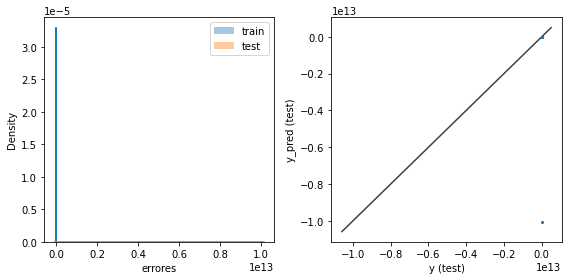

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 7785.918676084093
Raíz del error cuadrático medio en Test: 8292.006269144147


C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


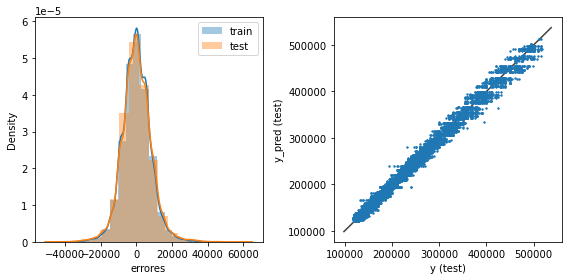

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 20297.72819335312
Raíz del error cuadrático medio en Test: 21517.534743518587


C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


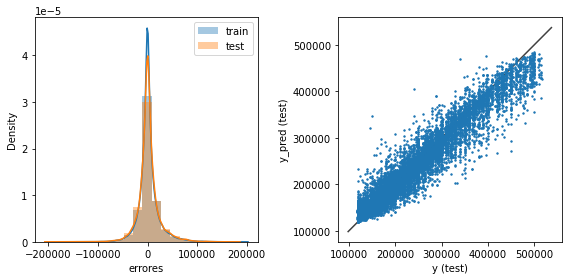

In [129]:
#Vuelvo a graficar las métricas de los modelos
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([modelo_lineal2, arbol_regresor2, vecinos_regresor2]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

## Concluciones Finales Parte A: 

Efectivamente, tras el aumento exponencial de las columnas habiend codificado los features de "Barrios" y habiendo agregado el dato del valor del metro cuadrado, al volver a entrenar los modelos y hubo resultado muy intersantes: 

1. El modelo de regresión lineal colapsó dando un error desmedido para la parte TEST imposibilitando su graficación 
2. El modelo de árbol de decisión bajó 30 mil unidades tanto para train como para test, mejorando su rendimiento. 
3. El modelo estrella o que mejor supo aprovechar las nuevas columnas agregadas al dataset fue el modelo de Árbol de Decisión que volvió a reducir el error en 42 mil unidades respecto al primer intento, y consecuentemente sigue siendo el mejor modelo entre los 3. 

## Parte B - Modelos avanzados 

Dado que de los 3 modelos probados en la parte A, el árbol de decisión ha tenido una mejora tan significativa respecto a los otros modelos he decido probar el Randon Forest como primer modelo avanzado para ver si puede mejorar los resultados del árbol. 

## Modelo Avanzado N°1 - Random Forest


In [78]:
#Importo nuevas librerías 

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve


# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

# Configuración warnings
# ==============================================================================
#import warnings
#warnings.filterwarnings('once')

In [79]:
#Nuevamente definimos el train-test-split
X = propfinal[['re_bathrooms', 're_rooms', 're_surface', 'property_type_Casa', 'property_type_Departamento', 'property_type_Local comercial', 'property_type_Lote', 'property_type_Oficina', 'property_type_Otro', 'property_type_PH', 're_pricem2', 're_lat', 're_lon', 'barrio_Abasto','barrio_Agronomía', 'barrio_Almagro', 'barrio_Balvanera','barrio_Barracas', 'barrio_Barrio Norte', 'barrio_Belgrano','barrio_Boca', 'barrio_Boedo', 'barrio_Caballito', 'barrio_Catalinas',
       'barrio_Centro / Microcentro', 'barrio_Chacarita', 'barrio_Coghlan',
       'barrio_Colegiales', 'barrio_Congreso', 'barrio_Constitución',
       'barrio_Flores', 'barrio_Floresta', 'barrio_Las Cañitas',
       'barrio_Liniers', 'barrio_Mataderos', 'barrio_Monserrat',
       'barrio_Monte Castro', 'barrio_Nuñez', 'barrio_Once', 'barrio_Palermo',
       'barrio_Parque Avellaneda', 'barrio_Parque Centenario',
       'barrio_Parque Chacabuco', 'barrio_Parque Chas',
       'barrio_Parque Patricios', 'barrio_Paternal', 'barrio_Pompeya',
       'barrio_Puerto Madero', 'barrio_Recoleta', 'barrio_Retiro',
       'barrio_Saavedra', 'barrio_San Cristobal', 'barrio_San Nicolás',
       'barrio_San Telmo', 'barrio_Tribunales', 'barrio_Velez Sarsfield',
       'barrio_Versalles', 'barrio_Villa Crespo', 'barrio_Villa Devoto',
       'barrio_Villa General Mitre', 'barrio_Villa Lugano',
       'barrio_Villa Luro', 'barrio_Villa Ortuzar', 'barrio_Villa Pueyrredón',
       'barrio_Villa Real', 'barrio_Villa Riachuelo',
       'barrio_Villa Santa Rita', 'barrio_Villa Soldati',
       'barrio_Villa Urquiza', 'barrio_Villa del Parque']]
y = propfinal.price

In [80]:
#Vuelvo a diseñar el modelo de train y test para los modelos avanzados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [81]:
#Defino el modelo de Random Forest
forest_model = RandomForestRegressor(n_estimators = 10, 
                                  random_state = 2016,
                                  min_samples_leaf = 8,)

In [82]:
#Entreno el modelo
forest_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=8, n_estimators=10, random_state=2016)

In [83]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = forest_model.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = forest_model.predict(X_test)

In [84]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 1721.3416640760527
Raíz del error cuadrático medio en Test: 2048.834174957201


La mejora obtenida en los resultados del RMSE es muy significativa, reduciendo casi 5 mil unidades para traing y 6 mil unidades (siempre hablando de unidad de precio dolar) para test. 

## Optimización de Hiperparametros 

## Numero de árboles
 
Si bien puede que el aumento en el número de árboles no afecte el resultado final considerablemente, puede generar un costo computacional innecesario por lo que se busca el número de árboles más óptmo.

C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were us

Valor óptimo de n_estimators: 141


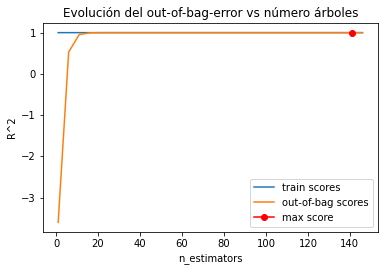

In [88]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

Valor óptimo de n_estimators: 96


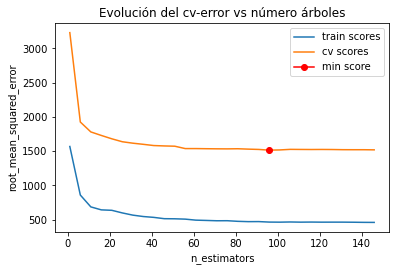

In [98]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Con ambas gráficas podemos ver que el root mean squared error no mejora significativamente luego de n_estimators= 60, produciendo un gasto significativo de recursos computacionales a partir de este valor, que no se se compensa con una reducción del error.

## Max Features

Busqueda de cuanto se descorrelacionan los árboles entre sí. 

Valor óptimo de max_features: 67


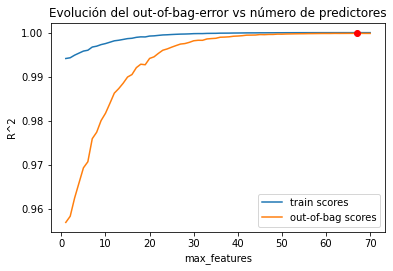

In [99]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

Valor óptimo de max_features: 63


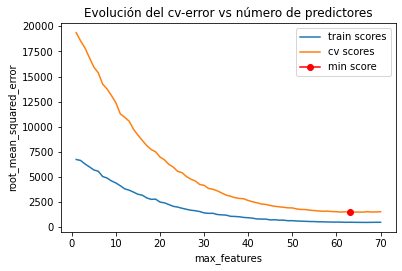

In [85]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

Acorde a las dos métricas utilizadas, el valor óptimo de max_features está entre 63 y 67

## Grid Search 

Aunque el análisis individual de los hiperparámetros es útil para entender su impacto en el modelo e identificar rangos de interés, la búsqueda final no debe hacerse de forma secuencial, ya que cada hiperparámetro interacciona con los demás. En esta segunda instancia utilizaré el Grid Search para la mejora de los hiperparametros. 

In [85]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
2,None,9,150,-12893.705644,352.366354,-4891.342647,48.608684
1,None,7,150,-14187.975911,360.683698,-5369.408959,45.537249
11,20,9,150,-15784.836598,408.540801,-10039.991184,110.849126
0,None,5,150,-16035.139983,320.255112,-6031.084429,47.998165


In [86]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': None, 'max_features': 9, 'n_estimators': 150} : -12893.705643701189 neg_root_mean_squared_error


Una vez identificados los mejores hiperparámetros, se reentrena el modelo indicando los valores óptimos en sus argumentos.

In [96]:
# Error de test del modelo final
# ==============================================================================
modelo_final_rf = grid.best_estimator_
predicciones = modelo.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1177.350216857775


Tras optimizar los hiperparámetros, se consigue reducir el error rmse del modelo a 1177.35. Las predicciones del modelo final se alejan en promedio 1177.35 unidades (1177.35 dólares) del valor real.

## Importancia de los predictores 

In [102]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo_final_rf.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,re_surface,0.631707
10,re_pricem2,0.365675
47,barrio_Puerto Madero,0.000247
7,property_type_Oficina,0.000138
6,property_type_Lote,0.000081
...,...,...
25,barrio_Chacarita,0.000016
14,barrio_Agronomía,0.000015
26,barrio_Coghlan,0.000012
20,barrio_Boca,0.000011


## Importancia de las permutaciones 

In [ ]:
importancia = permutation_importance(
                estimator    = modelo_final_rf,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

<AxesSubplot:>

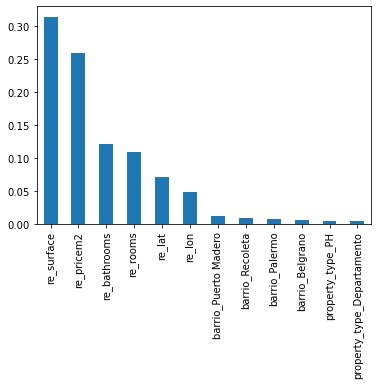

In [106]:
feat_importances = pd.Series(modelo_final_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='bar')

Según se observa, superficie cubierta y precio por metro cuadraro son las features más importantes para este modelo, y menor medida, pero con valores muy similares le siguen baños y habitaciones.

## Modelo Avanzado N° 2 - XGBOOST

In [90]:
#Importamos el modelo 

#Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing


In [116]:
#Vuelvo a diseñar el modelo de train y test para los modelos avanzados
#X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [110]:
#Al parecer el XGBoost encontró un error con un feature duplicado. Intentaré llegar al mismo. 
#duplicate_columns = propfinal.columns[propfinal.columns.duplicated()]

In [111]:
#duplicate_columns 

Index(['barrio_Abasto', 'barrio_Agronomía', 'barrio_Almagro',
       'barrio_Balvanera', 'barrio_Barracas', 'barrio_Barrio Norte',
       'barrio_Belgrano', 'barrio_Boca', 'barrio_Boedo', 'barrio_Caballito',
       'barrio_Catalinas', 'barrio_Centro / Microcentro', 'barrio_Chacarita',
       'barrio_Coghlan', 'barrio_Colegiales', 'barrio_Congreso',
       'barrio_Constitución', 'barrio_Flores', 'barrio_Floresta',
       'barrio_Las Cañitas', 'barrio_Liniers', 'barrio_Mataderos',
       'barrio_Monserrat', 'barrio_Monte Castro', 'barrio_Nuñez',
       'barrio_Once', 'barrio_Palermo', 'barrio_Parque Avellaneda',
       'barrio_Parque Centenario', 'barrio_Parque Chacabuco',
       'barrio_Parque Chas', 'barrio_Parque Patricios', 'barrio_Paternal',
       'barrio_Pompeya', 'barrio_Puerto Madero', 'barrio_Recoleta',
       'barrio_Retiro', 'barrio_Saavedra', 'barrio_San Cristobal',
       'barrio_San Nicolás', 'barrio_San Telmo', 'barrio_Tribunales',
       'barrio_Velez Sarsfield', 'barrio

In [ ]:
#Al parecer el XGBoost no está tomando los barrios en su procesamiento. Definiré X sin incluir los barrios. 

In [121]:
#X = propfinal[['re_bathrooms', 're_rooms', 're_surface', 're_pricem2', 're_lat', 're_lon']]
#y = propfinal.price

In [91]:
#Creación del modelo 
import xgboost as xgb
from xgboost import XGBRegressor

In [92]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'max_depth'        : [None, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'booster'          : ['gbtree']
             }


# Crear conjunto de validación
# ==============================================================================
np.random.seed(123)
idx_validacion = np.random.choice(
                    X_train.shape[0],
                    size= int(X_train.shape[0]*0.1),
                    replace=False
                 )

X_val = X_train.iloc[idx_validacion, :].copy()
y_val = y_train.iloc[idx_validacion].copy()

X_train_grid = X_train.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()
y_train_grid = y_train.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()

# XGBoost necesita pasar los paramétros específicos del entrenamiento al llamar
# al método .fit()
fit_params = {"early_stopping_rounds" : 5, 
              "eval_metric"           : "rmse", 
              "eval_set"              : [(X_val, y_val)],
              "verbose"               : 0
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = XGBRegressor(
                        n_estimators = 1000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train_grid, y = y_train_grid, **fit_params)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_booster,param_learning_rate,param_max_depth,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
22,gbtree,0.01,20,0.5,-1008.880575,72.233081,-224.122671,3.677588
20,gbtree,0.01,10,0.5,-1137.327027,61.288912,-609.652203,3.283986
23,gbtree,0.01,20,1,-1216.075098,69.875561,-61.899602,0.530334
34,gbtree,0.1,20,0.5,-1276.673450,88.603142,-98.711120,21.103408


In [93]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

# Número de árboles del modelo final (early stopping)
# ==============================================================================
n_arboles_incluidos = len(grid.best_estimator_.get_booster().get_dump())
print(f"Número de árboles incluidos en el modelo: {n_arboles_incluidos}")

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 20, 'subsample': 0.5} : -1008.8805753661535 neg_root_mean_squared_error
Número de árboles incluidos en el modelo: 1000


In [94]:
# Error de test del modelo final
# ==============================================================================
modelo_final_xgb = grid.best_estimator_
predicciones = modelo_final_xgb.predict(X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 849.8891716457618


Se lograr una reducción del error mucho más sustancial que en el Random Forest

In [98]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo_final_xgb.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,re_surface,0.631707
10,re_pricem2,0.365675
47,barrio_Puerto Madero,0.000247
7,property_type_Oficina,0.000138
6,property_type_Lote,0.000081
...,...,...
25,barrio_Chacarita,0.000016
14,barrio_Agronomía,0.000015
26,barrio_Coghlan,0.000012
20,barrio_Boca,0.000011


Los predictores de mayor relevancia han sido Superficie y PrecioxM2 

In [130]:
importancia = permutation_importance(
                estimator    = modelo_final_xgb,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
2,117907.590135,104.467909,re_surface
3,97215.769450,154.494292,re_pricem2
5,204.040121,14.435435,re_lon
4,170.797876,10.777817,re_lat
1,90.221243,5.010429,re_rooms
0,69.215931,4.015429,re_bathrooms


Los permutadores de mayor relevancia han sido Superfie y PrecioxM2

## Obtenido los resultados de ambos modelos, los grafico y comparo en train y test 

Modelo: Random Forest
Raíz del error cuadrático medio en Train: 4530.394920598558
Raíz del error cuadrático medio en Test: 12008.662016246544


C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


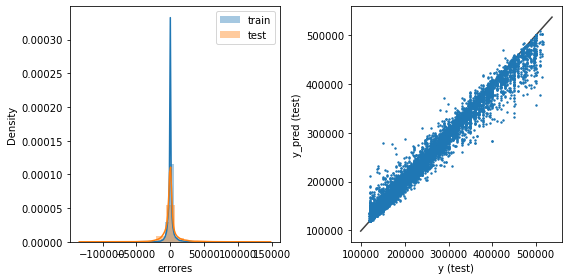

Modelo: X G BOOST
Raíz del error cuadrático medio en Train: 268.56092194522375
Raíz del error cuadrático medio en Test: 849.8891716457618


C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gasto\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


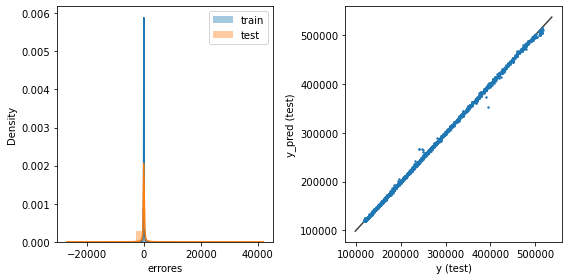

In [95]:
#Vuelvo a graficar las métricas y comparo ambos modelos avanzados por train y test 
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Random Forest', 'X G BOOST']

for i, model in enumerate([modelo_final_rf, modelo_final_xgb]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

El modelo XGboost presenta mejoras en la reducción del RMSE respecto del Random Forest y reduce la diferencia entre los conjuntos train y test. El modelo Random Forest obtiene un buen desempeño en Train, pero demuestra una gran varianza respecto de test, lo que podría indicar un sobre ajuste en el modelo. Es un punto importante de mejora para trabajar en la entrega final.

## Conclusiones Finales 

La parte A del proyecto ha sido fundamental para la mejora en los resultados de los modelos. Tan solo con el trabajo de la base de datos se logró una reducción muy considerable sobre el error de los modelos, sin siquiera probar los modelos avanzados. En lo personal y particular, a la vista de los resultados, creo que hubo dos elementos fundamentales que marcaron una gran reducción del error, sin contar la eliminación de los valores faltantes, y ha sido la codificación de valores y los re-escalados. Si bien el check list solo pedía alguno de ellos, creo que haber realizado los dos marcó una diferencia más que sustancial. 


En efecto, utilizando los mismos modelos que en el primer proyecto, se paso de una raíz del error cuadrático medio en Test: 177519.78, para el mejor modelo a un error cuadrático medio en Test de 8292.006, sin una varianza muy importante entre Train y Test.


En cuanto a los modelos avanzados consiguen una mejora muy significativa respecto a los primeros modelos. El modelo XGboost ha sido el mejor modelo entre ambps ya que obtuvo mejores resultados, tras optimizar los hiperparámetros, se consigue reducir el error rmse del modelo a 849.88 para test. El Random Forest también logró tener un buen desempeño, pero muestra una diferencia sustancial entre los conjuntos entre train y test, lo que indica que el modelo podría estar sobre ajustando. Por esta misma razón, el modelo XGBoost vuelve a ser superior, ya que no solo redujo los errores (RMES) en ambos juntos de train y test, sino que también reduce la diferencia entre ambos conjustos de train y test, aunque se debe destacar que el modelo tardó más de una hora procesarse. 

Es destacable que para ambos modelos avanzados, los predictores más imporantes han sido "Superficie" y "Precio por metro2". 

A modo de cierre, aunque el XGBoost haya sido un modelo superior, el random forest se podría revisar para el cierre del proyecto final de la carrera con el objetivo de reducir el sobreajuste y lograr valores uniformes entre ambos conjuntos de train y test. De la misma forma para el modelo XGBoost. 